# To find final number of elected MP's in a district/national-level

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
df=pd.read_csv('C:/Users/Hp/Desktop/GoesGold/ElectionData.csv')

In [3]:
#checking shape of a dataset
df.shape

(21643, 28)

It is having 21643 rows and 28 columns

In [4]:
#displaying first five rows
df.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


In [5]:
#checking unique values
df.nunique()

TimeElapsed                   54
time                          54
territoryName                 21
totalMandates                 62
availableMandates             69
numParishes                   20
numParishesApproved          219
blankVotes                   329
blankVotesPercentage         146
nullVotes                    331
nullVotesPercentage          107
votersPercentage             282
subscribedVoters             335
totalVoters                  336
pre.blankVotes               323
pre.blankVotesPercentage     130
pre.nullVotes                329
pre.nullVotesPercentage       90
pre.votersPercentage         278
pre.subscribedVoters         331
pre.totalVoters              331
Party                         21
Mandates                      67
Percentage                  1363
validVotesPercentage        1387
Votes                       4029
Hondt                         41
FinalMandates                 17
dtype: int64

In [6]:
#checking data types
df.dtypes

TimeElapsed                   int64
time                         object
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates               

Time,TerrotoryName and Party are object datatype remaining all are float or int type

In [7]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               21643 non-null  int64  
 1   time                      21643 non-null  object 
 2   territoryName             21643 non-null  object 
 3   totalMandates             21643 non-null  int64  
 4   availableMandates         21643 non-null  int64  
 5   numParishes               21643 non-null  int64  
 6   numParishesApproved       21643 non-null  int64  
 7   blankVotes                21643 non-null  int64  
 8   blankVotesPercentage      21643 non-null  float64
 9   nullVotes                 21643 non-null  int64  
 10  nullVotesPercentage       21643 non-null  float64
 11  votersPercentage          21643 non-null  float64
 12  subscribedVoters          21643 non-null  int64  
 13  totalVoters               21643 non-null  int64  
 14  pre.bl

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64


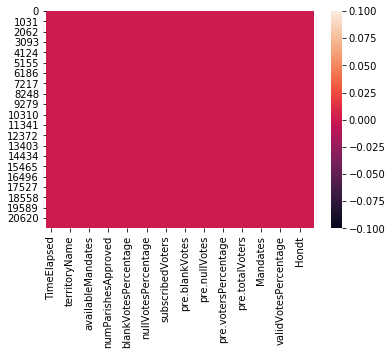

In [8]:
#checking missing values
print(df.isnull().sum())
sns.heatmap(df.isnull())


There are no missing values present in the dataset

In [9]:
#Summary Statistics
df.describe()

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
count,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,...,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,2.164300e+04,21643.000000,21643.000000
mean,133.146052,11.544795,11.499284,309.956013,261.090237,8875.066673,2.621629,6148.068752,1.961471,51.983722,...,1.777442,54.549372,6.378503e+05,3.594932e+05,0.565495,4.968484,5.207232,1.585209e+04,1.126138,1.126138
std,77.651193,31.314567,31.738783,659.055911,583.377428,21484.874088,0.795289,14735.469269,0.375250,4.854380,...,0.388798,4.964948,1.544418e+06,8.763729e+05,4.421804,10.379967,10.881108,9.310605e+04,6.293552,6.872644
min,0.000000,0.000000,0.000000,54.000000,3.000000,19.000000,0.530000,39.000000,1.340000,35.980000,...,1.140000,40.870000,6.383000e+03,3.215000e+03,0.000000,0.020000,0.020000,1.000000e+00,0.000000,0.000000
25%,65.000000,1.000000,0.000000,75.000000,67.000000,1188.000000,2.230000,1094.000000,1.720000,50.290000,...,1.520000,51.210000,1.289260e+05,6.964400e+04,0.000000,0.220000,0.230000,2.360000e+02,0.000000,0.000000
50%,135.000000,4.000000,3.000000,147.000000,120.000000,2998.000000,2.640000,2232.000000,1.870000,53.130000,...,1.690000,56.260000,2.284970e+05,1.102730e+05,0.000000,0.620000,0.650000,7.900000e+02,0.000000,0.000000
75%,200.000000,9.000000,9.000000,242.000000,208.000000,6889.000000,2.980000,4121.000000,2.230000,54.550000,...,1.970000,58.220000,3.933140e+05,2.276200e+05,0.000000,3.010000,3.160000,4.510000e+03,0.000000,0.000000
max,265.000000,226.000000,226.000000,3092.000000,3092.000000,129599.000000,5.460000,88539.000000,3.350000,59.870000,...,3.120000,62.580000,9.439701e+06,5.380451e+06,106.000000,49.110000,51.420000,1.866407e+06,94.000000,106.000000


Obervations:
    In totalmandates min value is 0 and max is 226,there may be outliers present as there is large difference in 75% and max value.
    Totalmandates are rightly skewed as mean is greater than median.likewise in most of the columns having outliers
    


In [10]:
#checking uniqueness of object data type
df['territoryName'].unique()

array(['Território Nacional', 'Aveiro', 'Beja', 'Braga', 'Bragança',
       'Castelo Branco', 'Coimbra', 'Évora', 'Faro', 'Guarda', 'Leiria',
       'Lisboa', 'Madeira', 'Portalegre', 'Porto', 'Santarém', 'Setúbal',
       'Viana do Castelo', 'Vila Real', 'Viseu', 'Açores'], dtype=object)

In [11]:
df['Party'].unique()

array(['PS', 'PPD/PSD', 'B.E.', 'CDS-PP', 'PCP-PEV', 'PAN', 'CH',
       'R.I.R.', 'PCTP/MRPP', 'A', 'L', 'IL', 'JPP', 'NC', 'PDR', 'PNR',
       'PURP', 'PPM', 'MPT', 'PTP', 'MAS'], dtype=object)

Both has 21 unique categories

## Data Visualization

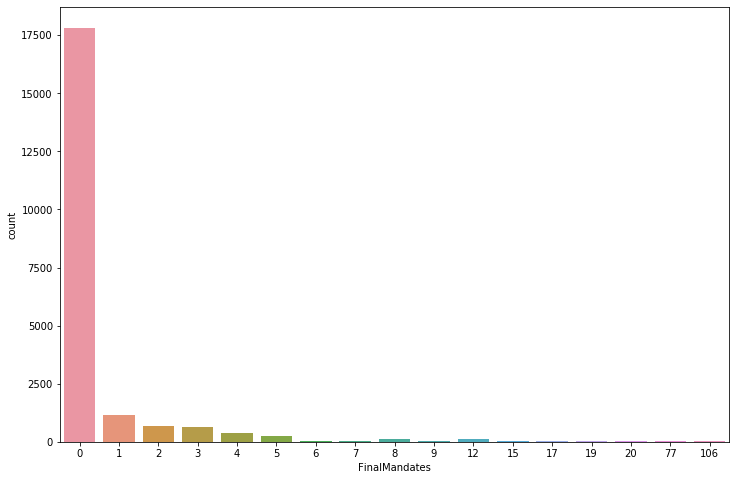

In [12]:
#distribution of target variable
plt.figure(figsize=(12,8))
sns.countplot(x='FinalMandates',data=df)

90% of the finalmandates is around 1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000BD393E6E88>,
      dtype=object)

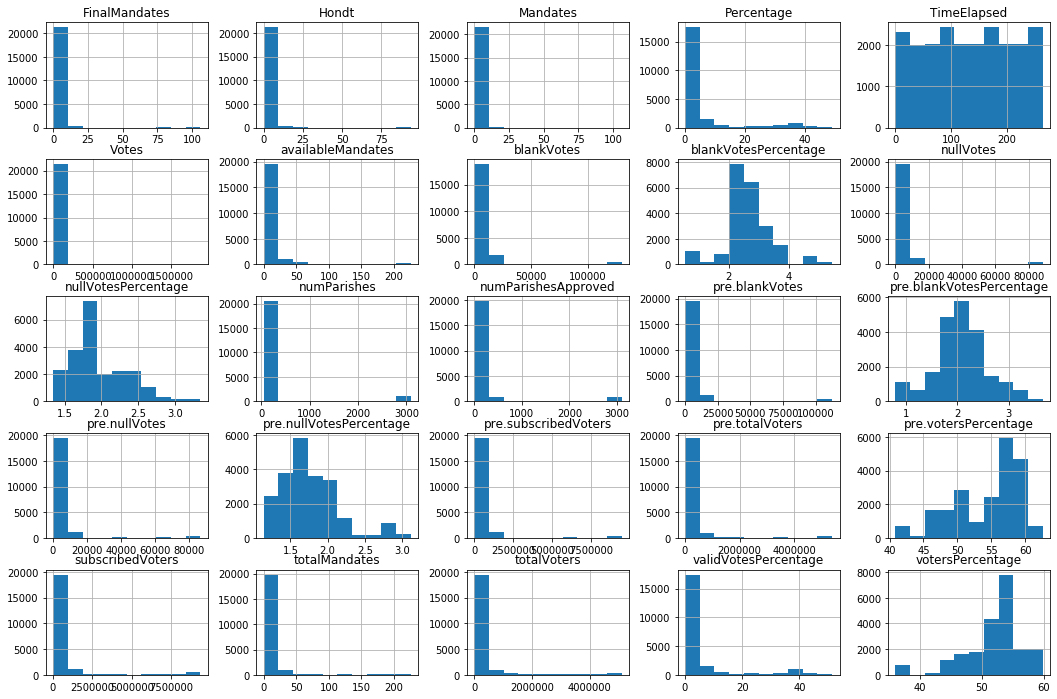

In [13]:
df.hist(figsize=(18,12))

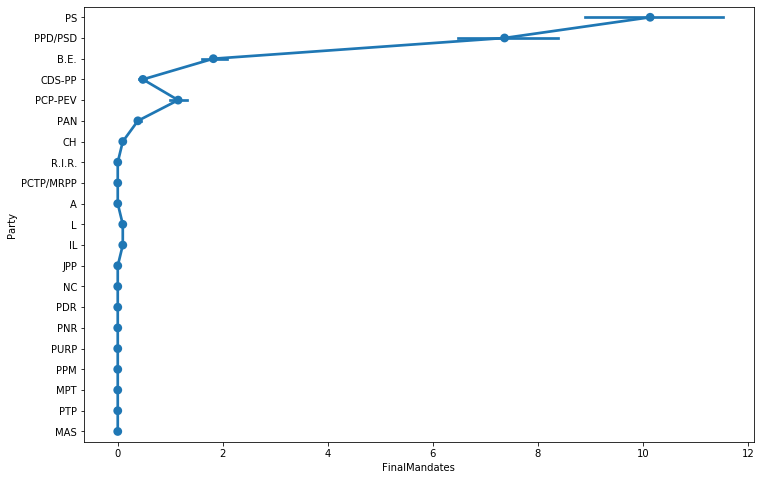

In [14]:
#finalmandates Vs party
plt.figure(figsize=(12,8))
sns.pointplot(x='FinalMandates',y="Party",data=df)

Most of the parties having zero final mandates
PS party has max final mandates around 10

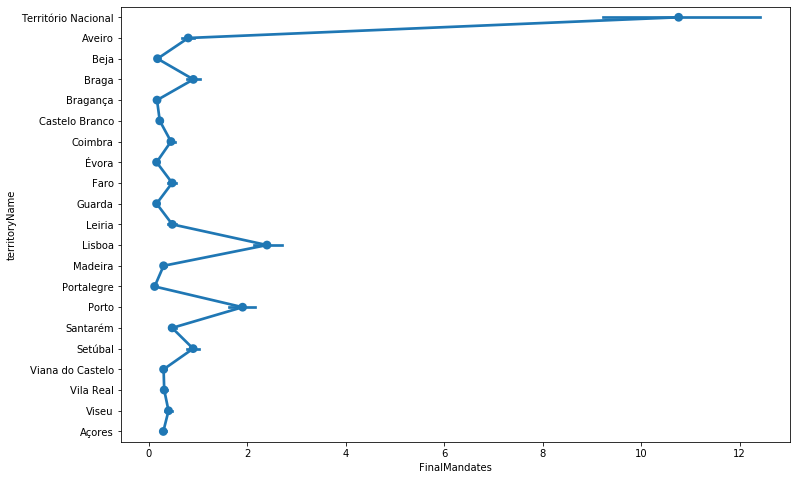

In [15]:
#finalmandates Vs territoryName
plt.figure(figsize=(12,8))
sns.pointplot(x='FinalMandates',y="territoryName",data=df)

1)Território Nacional is leading with the finalmandates
2)Lisboba and Porto having mandates around 2
3)other are having mandates around 1

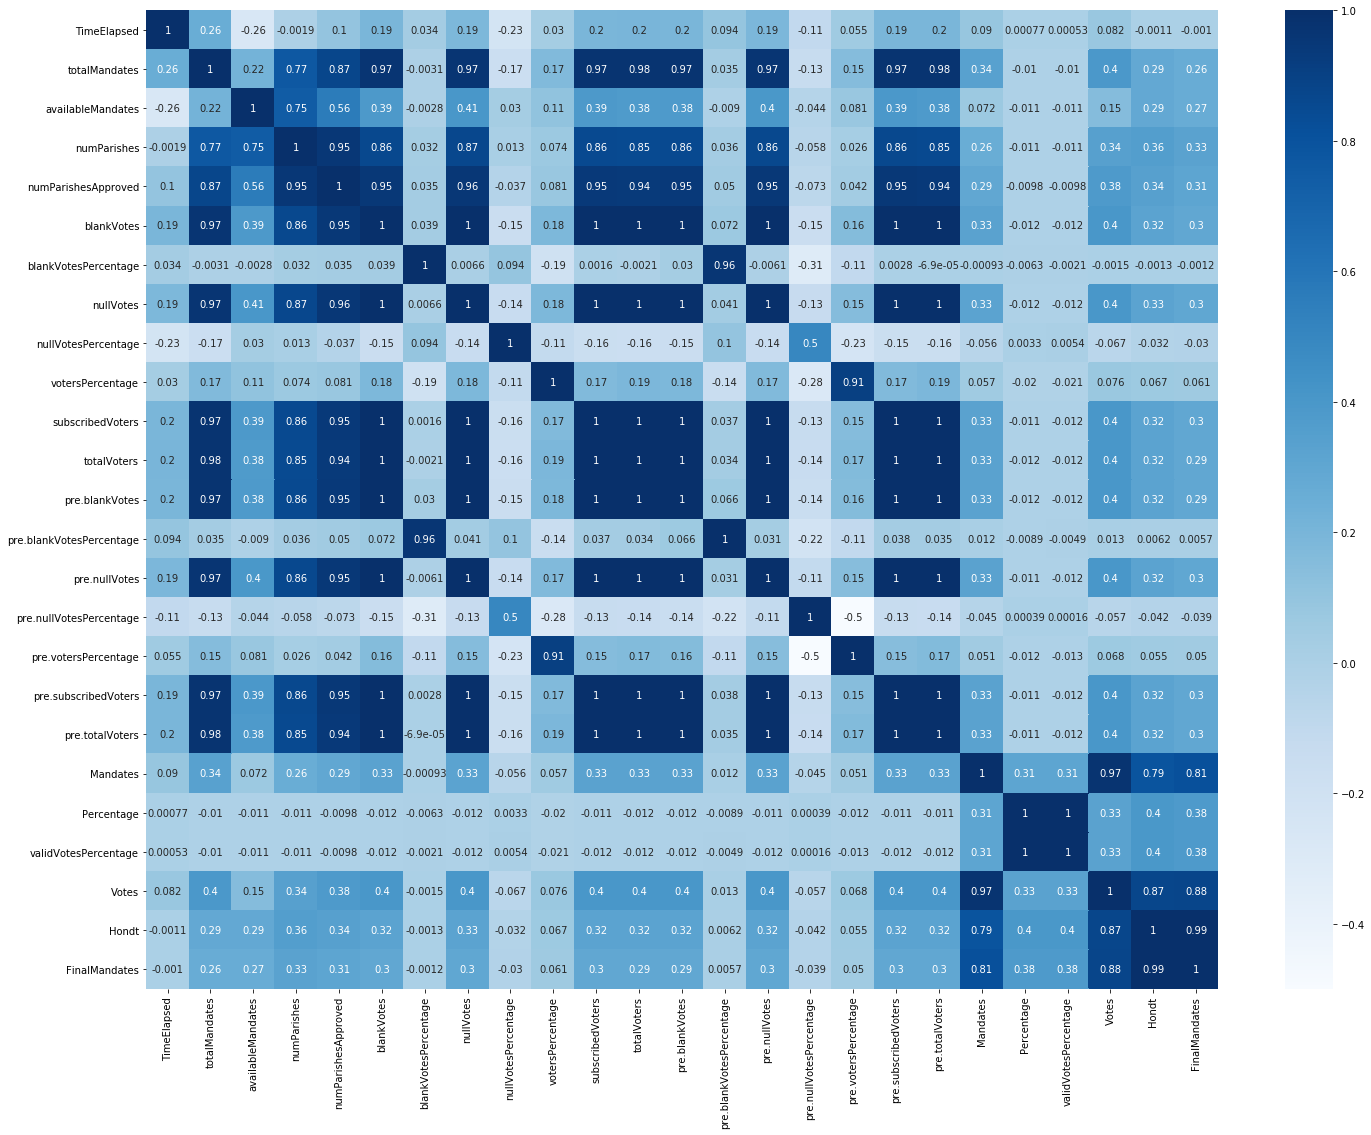

In [16]:
#checking correlation
plt.figure(figsize=(24,18))
sns.heatmap(df.corr(),annot=True,cmap="Blues")

TimeElapsed,blankVotesPercentage,nullVotesPercentage,pre.nullVotesPercentage are negatively correlated with target FinalMnadates

In [17]:
#dropping the column which are negatively correlated
df.drop(columns=['TimeElapsed','nullVotesPercentage','blankVotesPercentage','pre.nullVotesPercentage'],axis=1,inplace=True)

In [18]:
#converting categorical into numerical forms using label encoder
list=['time','territoryName','Party' ]
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in list:
    df[i]=lb.fit_transform(df[i])


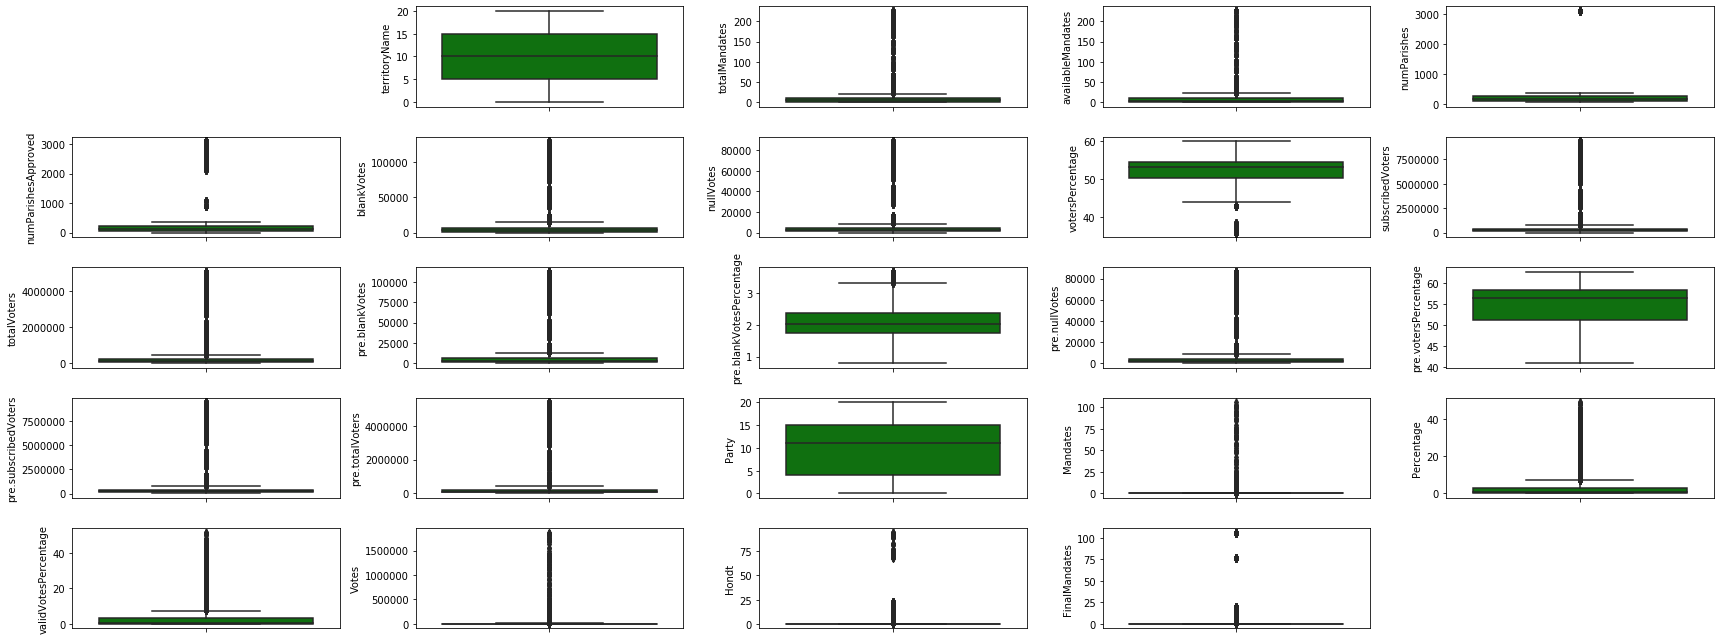

In [19]:
# plotting outliers
collist=df.columns.values
ncol=5
nrows=10
collist
plt.figure(figsize=(24,18))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()
    

There are many outliers present in the dataset lets remove using zscore

In [20]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[ 1.71470808,  0.98296816,  0.36868023, ...,  1.4192844 ,
        14.75732693, 15.25996213],
       [ 1.71470808,  0.98296816,  0.36868023, ...,  1.211248  ,
        12.69167309, 11.04023671],
       [ 1.71470808,  0.98296816,  0.36868023, ...,  0.11229293,
         2.36340389,  2.60078588],
       ...,
       [ 1.69806785,  1.48421407,  0.11320217, ...,  0.16751275,
         0.17893929,  0.1638618 ],
       [ 1.69806785,  1.48421407,  0.11320217, ...,  0.16769534,
         0.17893929,  0.1638618 ],
       [ 1.69806785,  1.48421407,  0.11320217, ...,  0.16899497,
         0.17893929,  0.1638618 ]])

In [21]:
threshold=3
print(np.where(z>3))

(array([    0,     0,     0, ..., 21608, 21623, 21623], dtype=int64), array([ 3,  4, 19, ..., 20, 19, 20], dtype=int64))


In [22]:
df_new=df[(z<3).all (axis=1)]
df_new

,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,nullVotes,votersPercentage,subscribedVoters,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
22,0,0,0,16,147,12,186,101,53.30,11953,...,54.56,12511,6826,17,0,34.33,35.95,2187,7,7
23,0,0,0,16,147,12,186,101,53.30,11953,...,54.56,12511,6826,1,0,7.47,7.82,476,1,2
24,0,0,0,16,147,12,186,101,53.30,11953,...,54.56,12511,6826,2,0,6.14,6.43,391,1,1
25,0,0,0,16,147,12,186,101,53.30,11953,...,54.56,12511,6826,11,0,2.39,2.50,152,0,0
26,0,0,0,16,147,12,186,101,53.30,11953,...,54.56,12511,6826,10,0,2.04,2.14,130,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,53,19,8,0,277,277,4995,3700,51.04,348061,...,51.28,371931,190712,9,0,0.19,0.20,332,0,0
21639,53,19,8,0,277,277,4995,3700,51.04,348061,...,51.28,371931,190712,14,0,0.18,0.19,326,0,0
21640,53,19,8,0,277,277,4995,3700,51.04,348061,...,51.28,371931,190712,8,0,0.14,0.15,256,0,0
21641,53,19,8,0,277,277,4995,3700,51.04,348061,...,51.28,371931,190712,18,0,0.13,0.14,239,0,0


In [23]:
df=df_new
df

,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,nullVotes,votersPercentage,subscribedVoters,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
22,0,0,0,16,147,12,186,101,53.30,11953,...,54.56,12511,6826,17,0,34.33,35.95,2187,7,7
23,0,0,0,16,147,12,186,101,53.30,11953,...,54.56,12511,6826,1,0,7.47,7.82,476,1,2
24,0,0,0,16,147,12,186,101,53.30,11953,...,54.56,12511,6826,2,0,6.14,6.43,391,1,1
25,0,0,0,16,147,12,186,101,53.30,11953,...,54.56,12511,6826,11,0,2.39,2.50,152,0,0
26,0,0,0,16,147,12,186,101,53.30,11953,...,54.56,12511,6826,10,0,2.04,2.14,130,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,53,19,8,0,277,277,4995,3700,51.04,348061,...,51.28,371931,190712,9,0,0.19,0.20,332,0,0
21639,53,19,8,0,277,277,4995,3700,51.04,348061,...,51.28,371931,190712,14,0,0.18,0.19,326,0,0
21640,53,19,8,0,277,277,4995,3700,51.04,348061,...,51.28,371931,190712,8,0,0.14,0.15,256,0,0
21641,53,19,8,0,277,277,4995,3700,51.04,348061,...,51.28,371931,190712,18,0,0.13,0.14,239,0,0


we have removed all the outliers

In [24]:
#checking skewness
df.skew()

time                        0.001643
territoryName               0.046402
totalMandates               2.561038
availableMandates           2.555337
numParishes                 0.602147
numParishesApproved         0.635834
blankVotes                  1.820880
nullVotes                   2.118361
votersPercentage           -0.464166
subscribedVoters            2.422378
totalVoters                 2.487315
pre.blankVotes              2.053443
pre.blankVotesPercentage   -0.329351
pre.nullVotes               2.348334
pre.votersPercentage       -0.516853
pre.subscribedVoters        2.384350
pre.totalVoters             2.485732
Party                       0.012401
Mandates                    7.254613
Percentage                  3.402089
validVotesPercentage        3.411801
Votes                       7.383535
Hondt                       7.080245
FinalMandates               6.803559
dtype: float64

In [25]:
for column in df.columns:
    if df.skew().loc[column]>0.55:
        df[column]=np.log1p(df[column])

In [26]:
#again checking skewnes
df.skew()

time                        0.001643
territoryName               0.046402
totalMandates               0.046942
availableMandates           0.462531
numParishes                -0.126868
numParishesApproved        -1.070703
blankVotes                 -0.711742
nullVotes                  -0.866060
votersPercentage           -0.464166
subscribedVoters           -0.744215
totalVoters                -0.630667
pre.blankVotes             -0.667496
pre.blankVotesPercentage   -0.329351
pre.nullVotes              -0.875553
pre.votersPercentage       -0.516853
pre.subscribedVoters       -0.775456
pre.totalVoters            -0.664067
Party                       0.012401
Mandates                    4.532111
Percentage                  1.577701
validVotesPercentage        1.562073
Votes                       0.251172
Hondt                       3.517272
FinalMandates               3.391440
dtype: float64

## Feature Selection

In [27]:
x=df.iloc[:,:-1]
x.shape

(18715, 23)

In [28]:
y=df.iloc[:,-1]
y.shape

(18715,)

## Model Building

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [30]:
#splitting into train test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
#feature scaling
#scaling the data
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [32]:
model=[LinearRegression(),Ridge(alpha=10),Lasso(alpha=1),ElasticNet(alpha=0.0001),SVR(kernel='linear'),KNeighborsRegressor(), DecisionTreeRegressor()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('r2 score:',r2_score(y_test,predm))
    print('mean absolute error:',mean_absolute_error(y_test,predm))
    print('root mean squared error:',np.sqrt(mean_squared_error(y_test,predm)))
    print('\n')

r2 score: 0.980547688651674
mean absolute error: 0.02092312729124232
root mean squared error: 0.06097794669457287


r2 score: 0.9804577379208357
mean absolute error: 0.020349527988822204
root mean squared error: 0.061118770180516396


r2 score: -2.609121052010721e-05
mean absolute error: 0.24980443030745703
root mean squared error: 0.4372127876904607


r2 score: 0.9804115930531914
mean absolute error: 0.020050666193413412
root mean squared error: 0.061190887078188885


r2 score: 0.9720791994043906
mean absolute error: 0.04835447342876349
root mean squared error: 0.0730551982673872


r2 score: 0.9967519635836536
mean absolute error: 0.0028717376990678536
root mean squared error: 0.024917108031751824


r2 score: 0.991300848032665
mean absolute error: 0.002515730284634809
root mean squared error: 0.04077797441842989




from above all models KNeighborsRegressor is having high score but lets cross validate models which are having high score

In [33]:
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),Ridge(alpha=10),KNeighborsRegressor(), DecisionTreeRegressor()]
for m in model:
    scores=cross_val_score(m,x,y,cv=5)
    print(scores)
    print(scores.mean(),scores.std())
    print('\n')

[0.91616347 0.96699922 0.9956152  0.99927971 0.99908257]
0.9754280320167095 0.031997794901270485


[0.91120872 0.96671298 0.9953002  0.99910608 0.99882233]
0.9742300628234197 0.03375127347603724


[0.53462273 0.90832605 0.95337682 0.95577308 0.92874413]
0.8561685598980752 0.16170951747341045


[0.86050772 0.98844356 0.99730627 1.         1.        ]
0.9692515114607353 0.05453724472664208




Linear Regression model is a good fit among all

## Ensemble Techniques

In [34]:
#checking scoring for Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
print("r2 score:",r2_score(y_test,y_pred))
print("mean squared error:",mean_squared_error(y_test,y_pred))
print("RSME:",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score: 0.9960383215234977
mean squared error: 0.0007572749770028526
RSME: 0.02751862963526441


In [35]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
predrf=ad.predict(x_test)
ad.score(x_train,y_train)

0.9728320730854529

In [36]:
from sklearn.model_selection import cross_val_score
model=[RandomForestRegressor(),AdaBoostRegressor()]
for m in model:
    scores=cross_val_score(m,x,y,cv=5)
    print(scores)
    print(scores.mean(),scores.std())
    print('\n')

[0.89220487 0.99419585 0.99876957 0.9999998  0.99997593]
0.9770292049556634 0.04246576180458394


[0.88468879 0.97008282 0.98876099 0.99367229 0.99247346]
0.9659356711259163 0.041503790992321016




Cross validation score for both the techniques is good but Linear Regression is giving nearly same score when we cross validate

In [37]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('r2_score is',r2_score(y_test,pred))
pred


r2_score is 0.980547688651674


array([-0.00392375,  0.01663147, -0.00031704, ...,  0.02776077,
        0.03935162, -0.00560116])

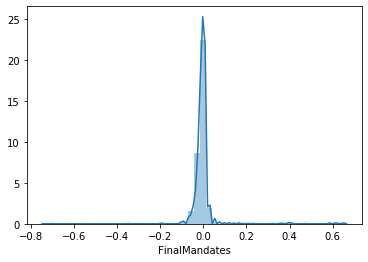

In [38]:
sns.distplot(y_test-pred)

In [39]:
#lets save a model
from sklearn.externals import joblib
joblib.dump(lr,'election.pkl')

['election.pkl']